In [2]:
import sys
sys.path.insert(0, '../gdaxtrader/')

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import pandas as pd
import numpy as np
import scipy as sci

In [14]:
from datetime import datetime, timedelta

In [18]:
import visualize as vis
import scrape
import ratesutil

In [24]:
import imp
import marketdata
imp.reload(marketdata)
imp.reload(vis)
imp.reload(ratesutil)

<module 'ratesutil' from '../gdaxtrader/ratesutil.py'>

In [80]:
def vol(secs_in_past, secs_per_tick):
    now = datetime.utcnow()
    start = now - timedelta(seconds=secs_in_past)
    rates = scrape.get_rates('LTC-USD', start, now, secs_per_tick)

    ratesdf = ratesutil.rates_df(rates)
    
    window = int(ratesdf.shape[0] / 10)
    
    rollstd = ratesdf.close.rolling(window=window).std()

    plt.plot(rollstd.index.values[::-1]*-secs_per_tick, rollstd)
    plt.show()

    rollmean = ratesdf.close.rolling(window=window).mean()

    plt.plot(rollmean.index.values[::-1]*-secs_per_tick, rollmean)
    plt.show()

2017-12-09 20:42:58 INFO     getting HISTORIC RATES
2017-12-09 20:42:58 INFO     performing GET request
2017-12-09 20:42:58 INFO     url: https://api.gdax.com/products/LTC-USD/candles
2017-12-09 20:42:58 INFO     params:
2017-12-09 20:42:58 INFO     {'start': '2017-12-10T01:32:58.855545', 'end': '2017-12-10T01:42:58.855545', 'granularity': 20}
2017-12-09 20:42:58 INFO     executing AUTHENTICATED request
2017-12-09 20:42:58 INFO     unix timestamp: 1512870178.862657
2017-12-09 20:42:58 INFO     UTC ISO8601: 2017-12-10T01:42:58.862657
2017-12-09 20:42:59 INFO     GET request completed in 0.24714s.
2017-12-09 20:42:59 INFO     status code: 200
2017-12-09 20:42:59 INFO     reason: OK
2017-12-09 20:42:59 WARNING  KNOWN BUG: HISTORIC RATES fetched_start < cur_start
2017-12-09 20:42:59 WARNING  fetched_start: 2017-12-10T01:32:40
2017-12-09 20:42:59 WARNING  start_dt: 2017-12-10T01:32:58.855545


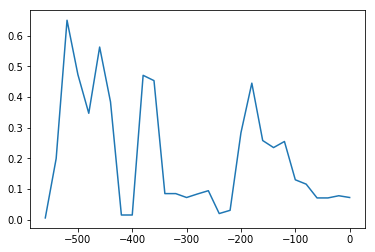

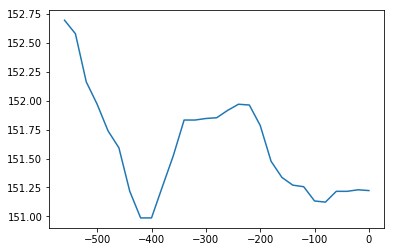

In [81]:
vol(600, 20)

2017-12-09 20:43:27 INFO     getting HISTORIC RATES
2017-12-09 20:43:27 INFO     performing GET request
2017-12-09 20:43:27 INFO     url: https://api.gdax.com/products/LTC-USD/candles
2017-12-09 20:43:27 INFO     params:
2017-12-09 20:43:27 INFO     {'start': '2017-12-10T01:38:27.023936', 'end': '2017-12-10T01:43:27.023936', 'granularity': 10}
2017-12-09 20:43:27 INFO     executing AUTHENTICATED request
2017-12-09 20:43:27 INFO     unix timestamp: 1512870207.032167
2017-12-09 20:43:27 INFO     UTC ISO8601: 2017-12-10T01:43:27.032167
2017-12-09 20:43:27 INFO     GET request completed in 0.230143s.
2017-12-09 20:43:27 INFO     status code: 200
2017-12-09 20:43:27 INFO     reason: OK
2017-12-09 20:43:27 WARNING  KNOWN BUG: HISTORIC RATES fetched_start < cur_start
2017-12-09 20:43:27 WARNING  fetched_start: 2017-12-10T01:38:20
2017-12-09 20:43:27 WARNING  start_dt: 2017-12-10T01:38:27.023936


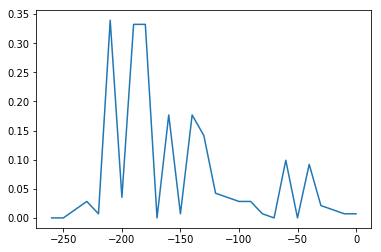

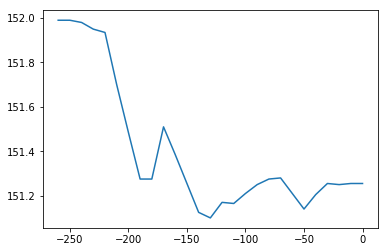

In [82]:
vol(300, 10)